In [1]:
import sys

sys.path.append("..")

In [2]:
from config import config

from preprocessor.findata_downloader import FinancialDataDownloader
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser

In [3]:
findownloader = FinancialDataDownloader(config.START_DATE, config.END_DATE)
data = findownloader.load_data("../" + config.DATA_DIR, config.TEST_NAME)

Data loaded from ../data/test.csv


In [4]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
data = finpreprocessor.preprocess(data, config.EXCHANGE_NYSE)

In [5]:
data

,Date,Ticker,Open,High,Low,Close,Volume,DayOfWeek
0,2016-01-04,AAPL,23.184077,23.807681,23.046251,23.803162,270597600.0,0
1,2016-01-05,AAPL,23.893542,23.916136,23.138891,23.206673,223164000.0,1
2,2016-01-06,AAPL,22.720895,23.129854,22.564995,22.752527,273829600.0,2
3,2016-01-07,AAPL,22.296114,22.623732,21.787741,21.792259,324377600.0,3
4,2016-01-08,AAPL,22.266747,22.393275,21.862307,21.907495,283192000.0,4
...,...,...,...,...,...,...,...,...
11315,2024-12-24,MSFT,432.985331,437.916385,432.527101,437.647400,7164500.0,1
11316,2024-12-26,MSFT,437.398354,439.251246,434.957756,436.432068,8194200.0,3
11317,2024-12-27,MSFT,432.935523,433.553144,424.717120,428.881104,18117700.0,4
11318,2024-12-30,MSFT,424.428211,425.912495,420.284140,423.202911,13158700.0,0


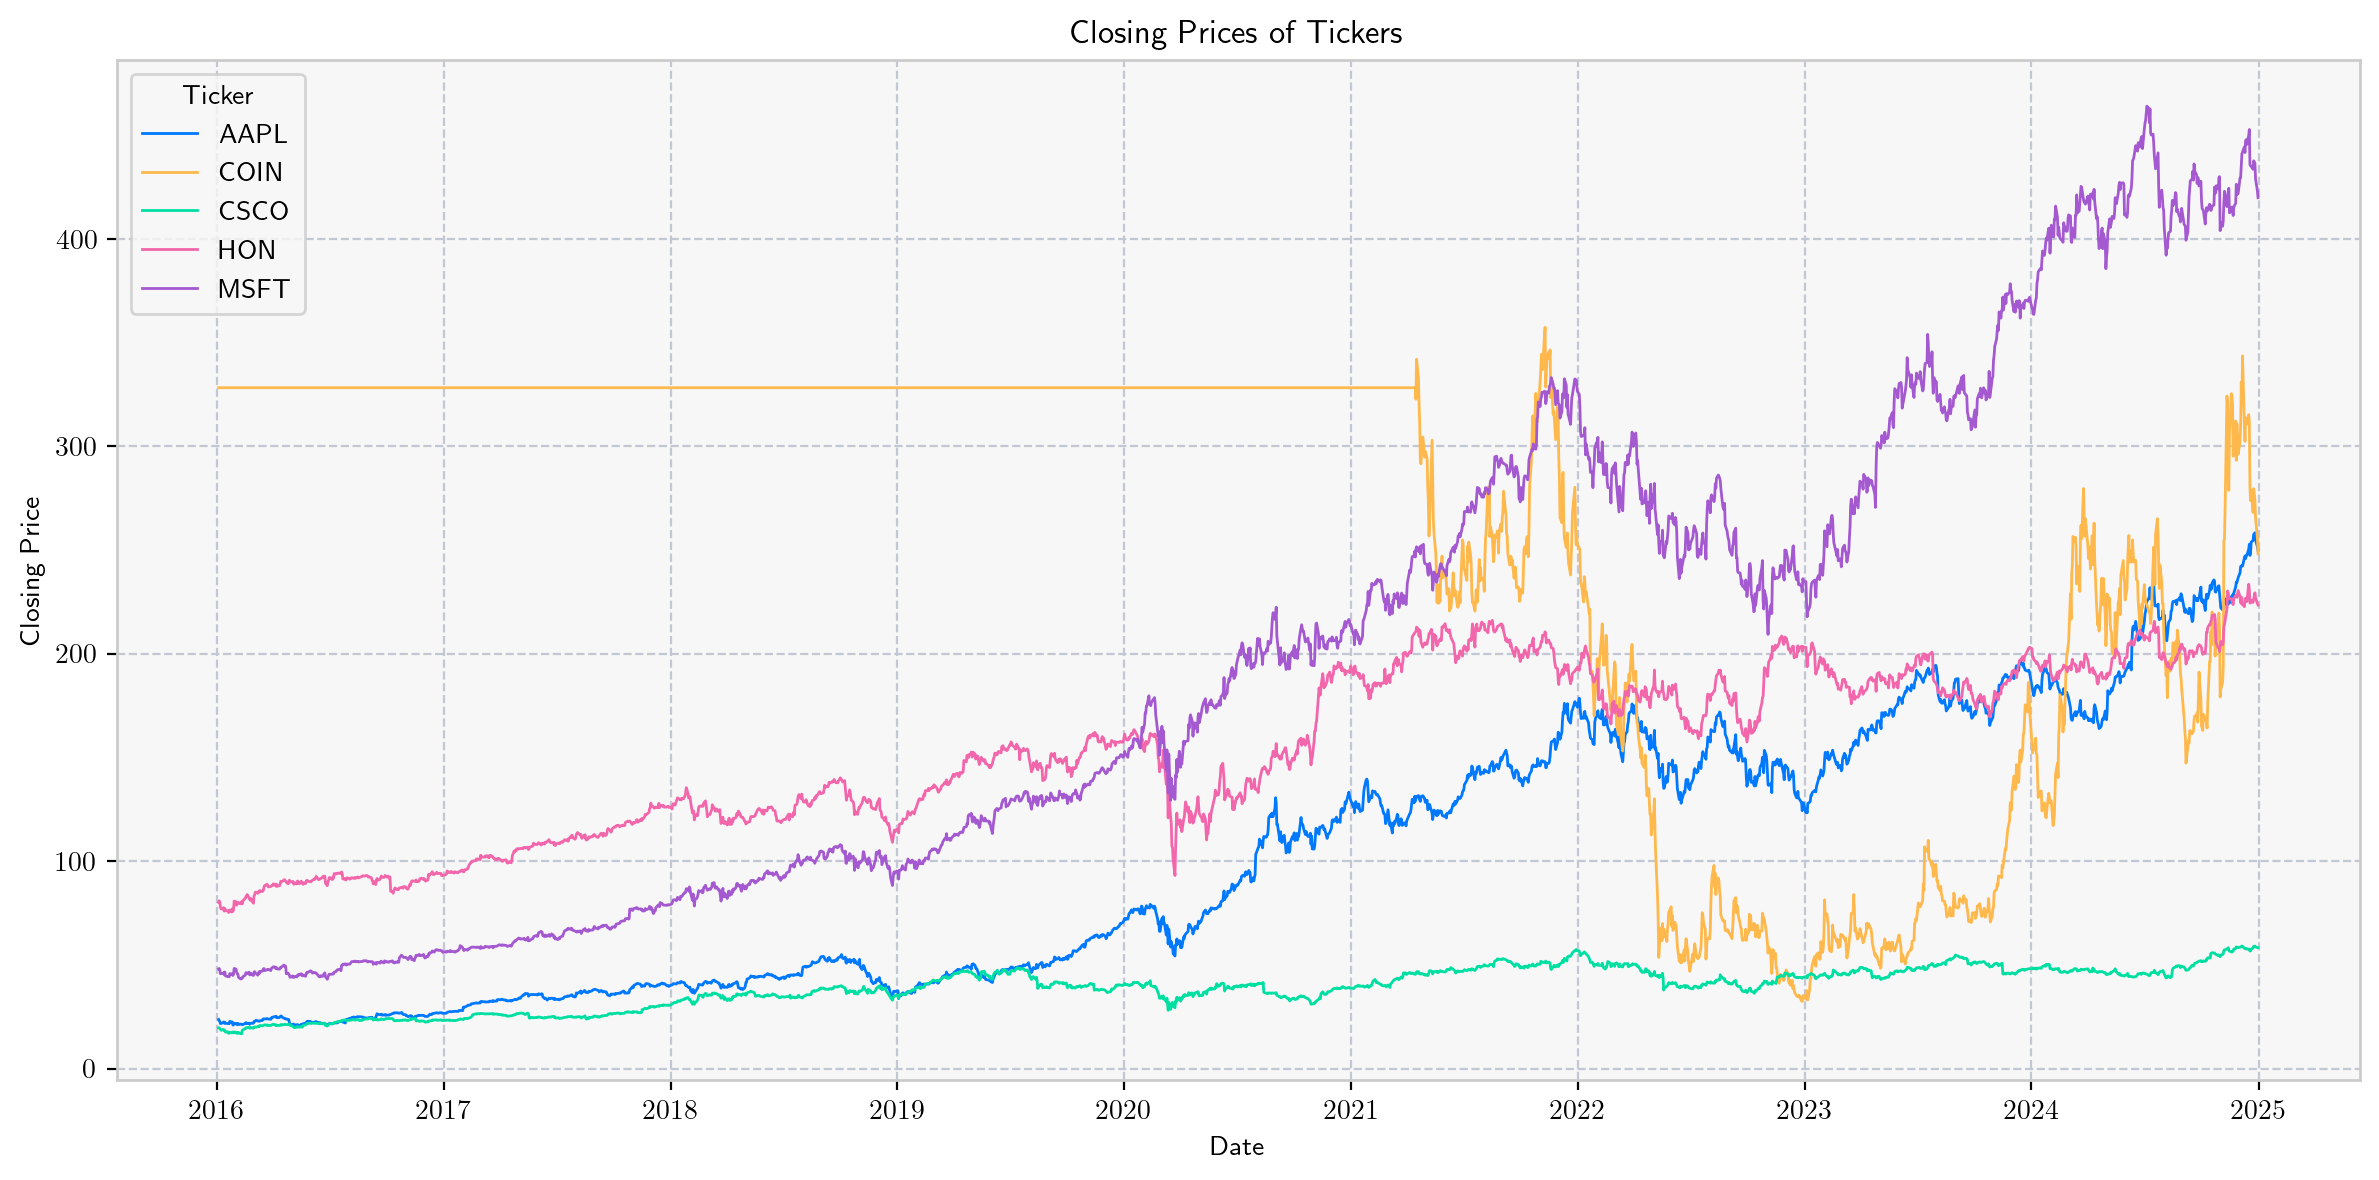

In [6]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_close_prices(
    data, "../" + config.PLOT_DIR, config.TEST_NAME + "_processed"
)

In [7]:
train_data, test_data = finpreprocessor.split_train_test(
    data, config.TRAIN_END_DATE
)

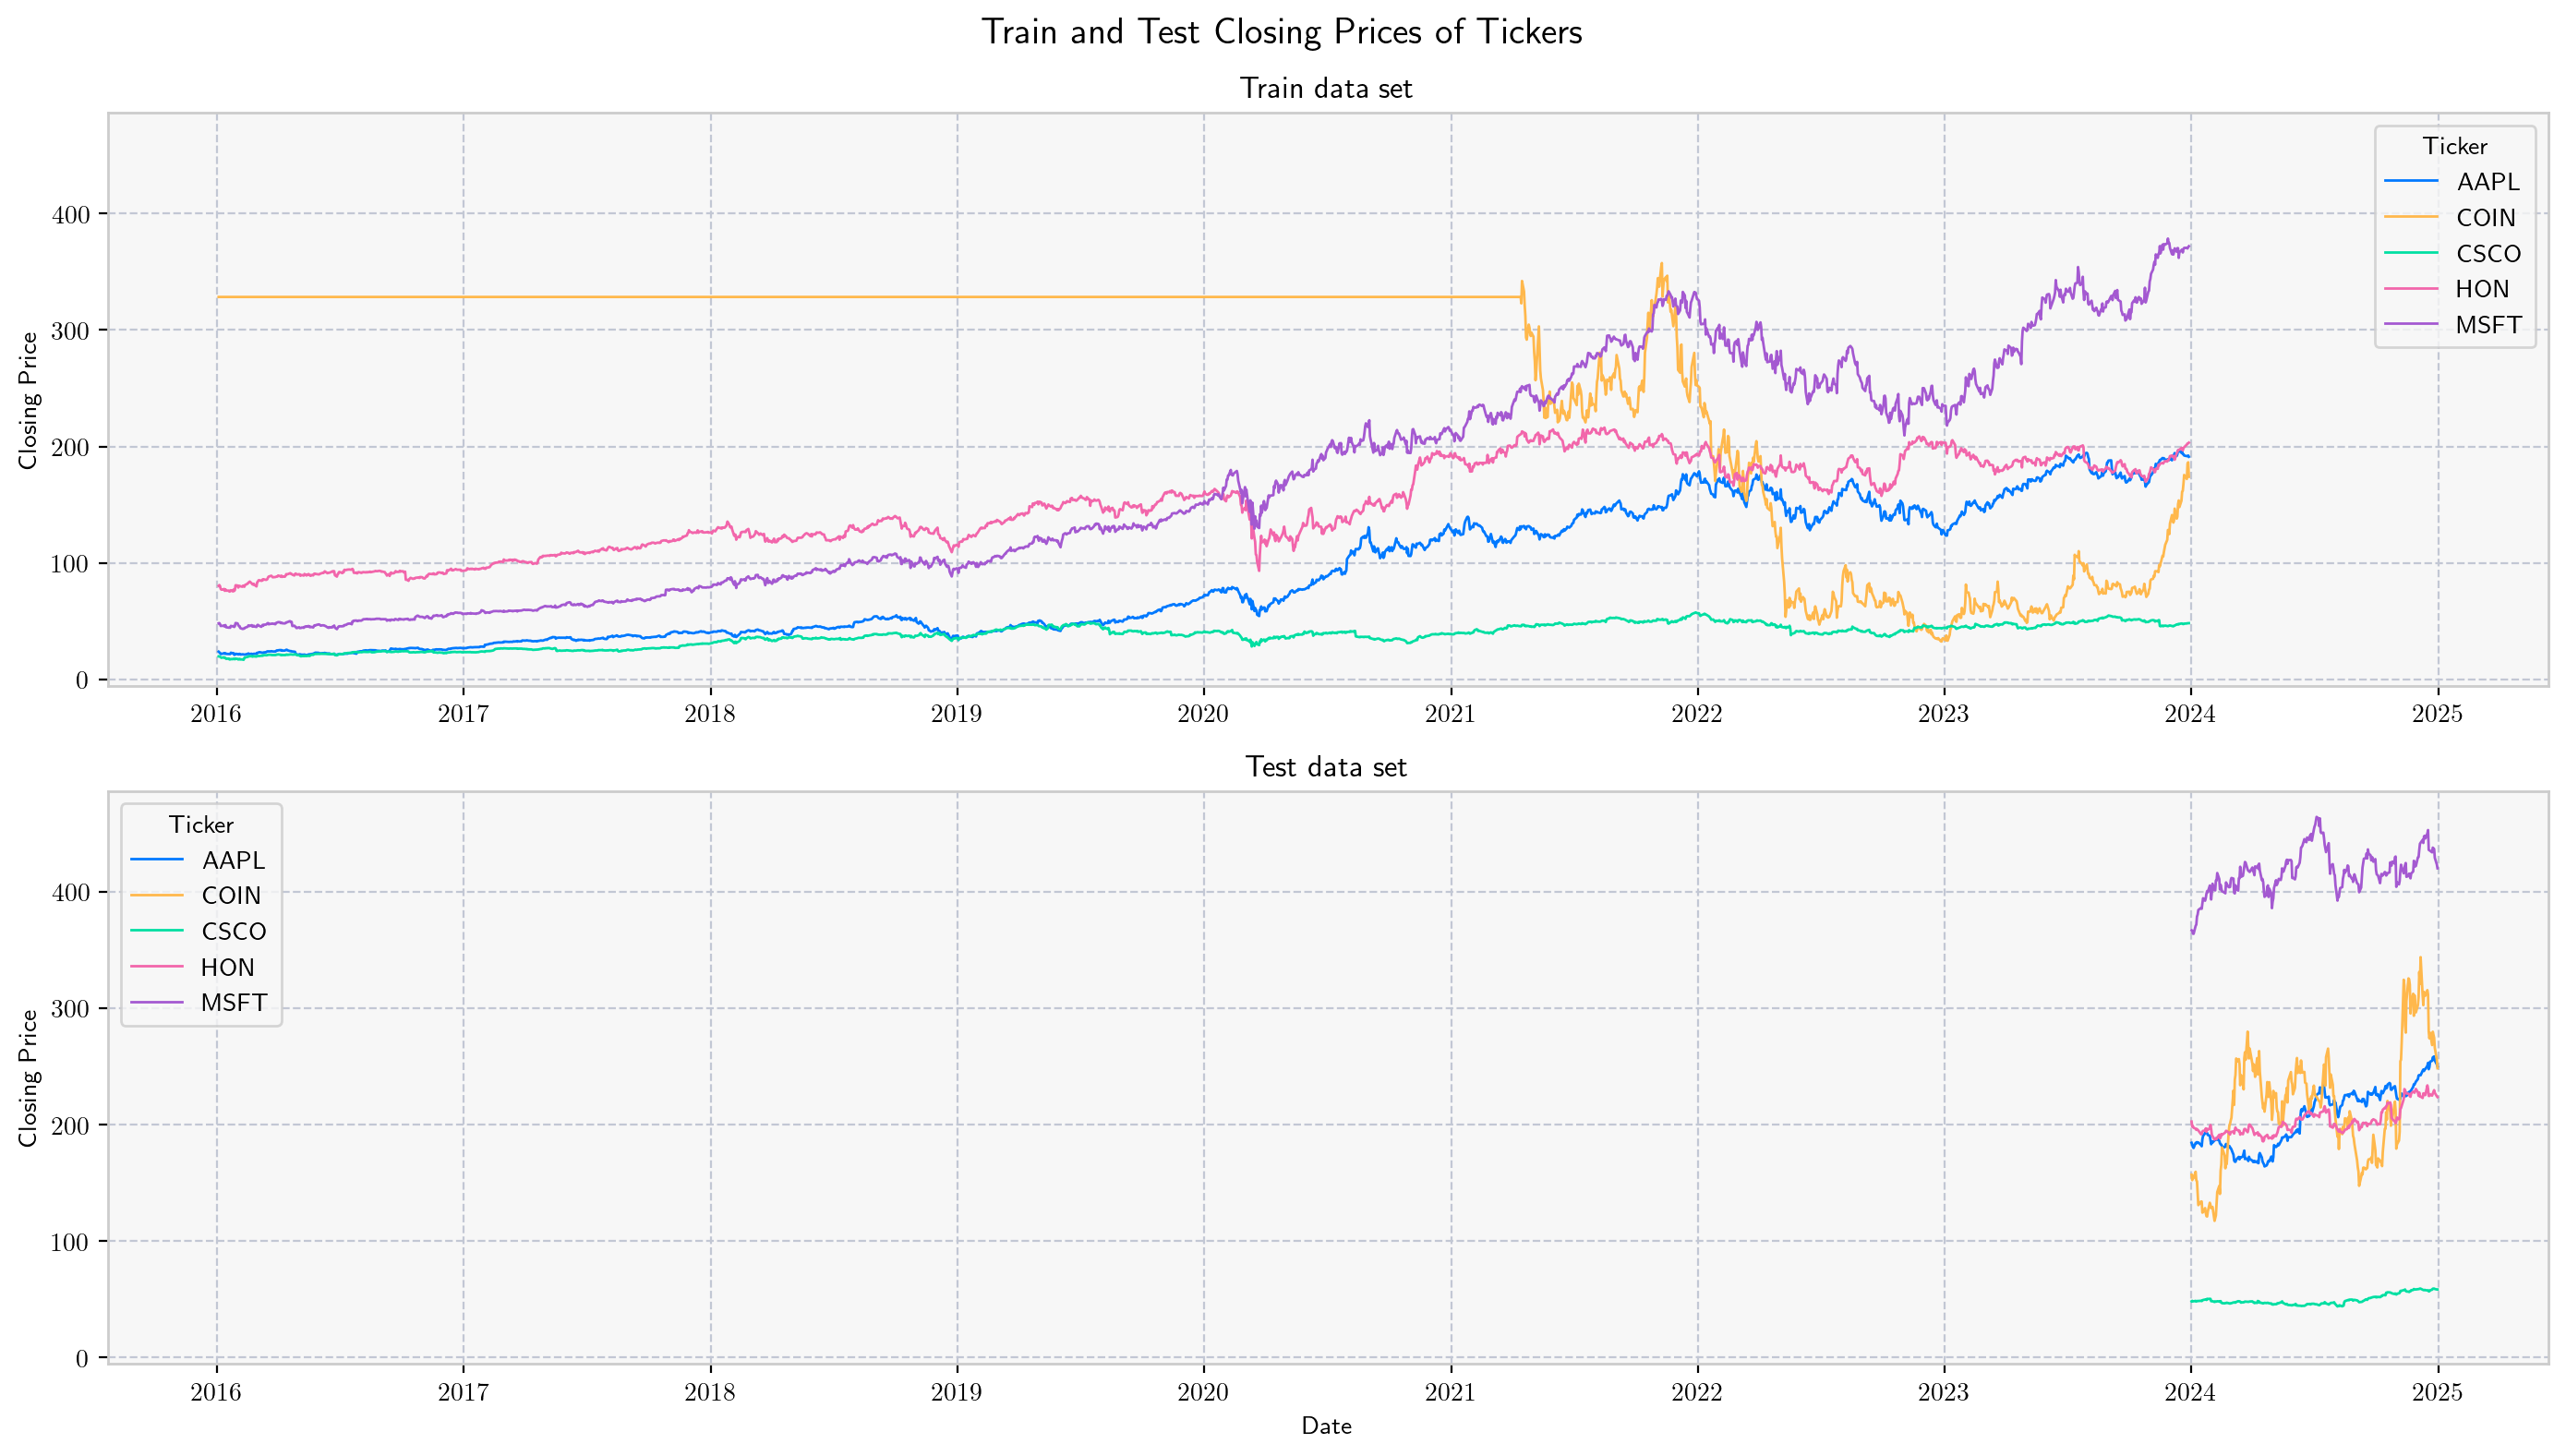

In [8]:
finvisualiser.plot_train_test_close_prices(
    train_data, test_data, "../" + config.PLOT_DIR, config.TEST_NAME
)